In [1]:
# temp=np.loadtxt('disease_ST_svd_1.txt')
# temp[0].shape

In [18]:
data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_'+str(i)+'.txt')
    data_ST_list.append(cc)


data_ST_list = np.array(data_ST_list)

data_ST_list.shape

-0.02029328412019309

In [19]:
data_ST_list.shape

(10, 500, 10000)

In [3]:
# np.max(data_ST)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

in_f = 10000



data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_'+str(i)+'.txt')
    data_ST_list.append(cc)


data_ST_list = np.array(data_ST_list)

data_ST = np.resize(data_ST_list,(5000,10000))

data_ST_ = []
for i in range(data_ST.shape[0]):#5000
    data_ST_.append(data_ST[i][0:in_f])

data_ST_ = np.array(data_ST_) # create a list of 5000 samples with 10000 features


del data_ST, data_ST_list





data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_'+str(i)+'.txt')
    data_SB_list.append(cc)


data_SB_list = np.array(data_SB_list)
data_SB = np.resize(data_SB_list,(5000,10000))

data_SB_ = []
for i in range(data_SB.shape[0]):
    data_SB_.append(data_SB[i][0:in_f])

data_SB_ = np.array(data_SB_) # for SB desease


del data_SB, data_SB_list




data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_svd_'+str(i)+'.txt')
    data_SR_list.append(cc)


data_SR_list = np.array(data_SR_list)
data_SR = np.resize(data_SR_list,(5000,10000))

data_SR_ = []
for i in range(data_SR.shape[0]):
    data_SR_.append(data_SR[i][0:in_f])

data_SR_ = np.array(data_SR_)


del data_SR, data_SR_list



data_ST_train = []
data_SR_train = []
data_SB_train = []

for i in range(4000):# i change it 3000>>>4000
    data_SB_train.append(data_SB_[i])
    data_SR_train.append(data_SR_[i])
    data_ST_train.append(data_ST_[i])



data_ST_test = []
data_SR_test = []
data_SB_test = []

for i in range(4000,5000): # i change it 3000--4000>>>4000--5000
    data_SB_test.append(data_SB_[i])
    data_SR_test.append(data_SR_[i])
    data_ST_test.append(data_ST_[i])


data_train = data_SB_train + data_SR_train + data_ST_train
data_test = data_SB_test + data_SR_test + data_ST_test


del data_SB_train, data_SR_train, data_ST_train
del data_SB_test, data_SR_test, data_ST_test



label_train = []
for i in range(4000):
    label_train.append(0)

for i in range(4000):
    label_train.append(1)

for i in range(4000):
    label_train.append(2)

label_train = np.array(label_train)

label_test = []
for i in range(1000):
    label_test.append(0)

for i in range(1000):
    label_test.append(1)

for i in range(1000):
    label_test.append(2)

label_test = np.array(label_test)





In [5]:
data_train = torch.FloatTensor(data_train)
label_train = torch.LongTensor(label_train)

data_test = torch.FloatTensor(data_test)
label_test = torch.LongTensor(label_test)
data_train.dtype, label_train.dtype, data_test.dtype, label_test.dtype, data_train.shape, label_train.shape, data_test.shape, label_test.shape


/tmp/ipykernel_19042/1119287424.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  data_train = torch.FloatTensor(data_train)


(torch.float32,
 torch.int64,
 torch.float32,
 torch.int64,
 torch.Size([12000, 10000]),
 torch.Size([12000]),
 torch.Size([3000, 10000]),
 torch.Size([3000]))

In [6]:
data_train = (data_train - data_train.min()) / (data_train.max() - data_train.min()) 
data_test = (data_test - data_test.min()) / (data_test.max() - data_test.min())

data_train.dtype, label_train.dtype, data_test.dtype, label_test.dtype, data_train.shape, label_train.shape, data_test.shape, label_test.shape


(torch.float32,
 torch.int64,
 torch.float32,
 torch.int64,
 torch.Size([12000, 10000]),
 torch.Size([12000]),
 torch.Size([3000, 10000]),
 torch.Size([3000]))

In [7]:
label_train.dtype

torch.int64

In [16]:
class Model(nn.Module):
  # def __init__(self, in_features= 10000 , h1= 6  , h2= 64 ,
  #               h3 = 64 , h4 = 32, h5 = 16,
  #                   out_features=3): 
  def __init__(self, in_features= 10000 , h1= 10  , h2= 5 ,
                h3 = 20 , h4 = 10, h5 = 5,
                    out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.fc4 = nn.Linear(h3, h4)
    self.fc5 = nn.Linear(h1, h5)


    self.out = nn.Linear(h5, out_features)

  def forward(self, x):
    x = (self.fc1(x))
    # x = F.relu(self.fc2(x))
    # x = F.relu(self.fc3(x))
    # x = F.relu(self.fc4(x))
    x = (self.fc5(x))


    x = self.out(x)

    return x


class ECGModel(nn.Module):
    def __init__(self):
        super(ECGModel, self).__init__()
        self.fc1 = nn.Linear(10000, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 3)  # Output layer with 3 classes

    def forward(self, x):
        x = (self.fc1(x))
        x = (self.fc2(x))
        x = (self.fc3(x))
        x = (self.fc4(x))
        x = self.fc5(x)
        return x
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Model().to(device)


In [17]:


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

epochs = 1000
# epochs = 100
losses = []
validation_losses = []
for i in range(epochs):
  
  y_pred = model.forward(data_train.to(device))

  loss = criterion(y_pred, label_train.to(device)).to('cpu')

  # Evaluate Model on Test Data Set (validate model on test set)
  with torch.no_grad():  # Basically turn off back propogation
    y_eval = model.forward(data_test.to(device)) # X_test are features from our test set, y_eval will be predictions
    validation_loss = criterion(y_eval, label_test.to(device)).to('cpu') # Find the loss or error
    validation_losses.append(validation_loss.detach().numpy().item())



  losses.append(loss.detach().numpy().item())

  if i % 100 == 0:
    print(f'Epoch: {i} and loss: {loss} validation loss : {validation_loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()





Epoch: 0 and loss: 1.111598014831543 validation loss : 1.1097654104232788
Epoch: 100 and loss: 1.0986108779907227 validation loss : 1.0988075733184814
Epoch: 200 and loss: 1.0985515117645264 validation loss : 1.098808765411377
Epoch: 300 and loss: 1.0984745025634766 validation loss : 1.0988004207611084
Epoch: 400 and loss: 1.0983803272247314 validation loss : 1.0987904071807861
Epoch: 500 and loss: 1.0982697010040283 validation loss : 1.0987799167633057
Epoch: 600 and loss: 1.098142147064209 validation loss : 1.0987685918807983
Epoch: 700 and loss: 1.097995638847351 validation loss : 1.0987566709518433
Epoch: 800 and loss: 1.0978267192840576 validation loss : 1.09874427318573
Epoch: 900 and loss: 1.0976307392120361 validation loss : 1.0987316370010376


In [10]:
torch.min(data_test)

tensor(0.)

In [11]:
losses = np.array(losses)
np.savetxt('loss_model_.txt', losses)

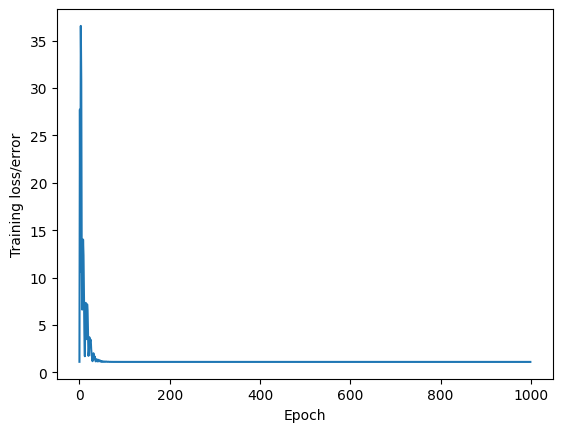

In [12]:
plt.plot(range(len(losses)), losses)
plt.ylabel("Training loss/error")
plt.xlabel('Epoch')
plt.savefig('training_loss.png')

In [13]:
validation_loss

tensor(1.0986)

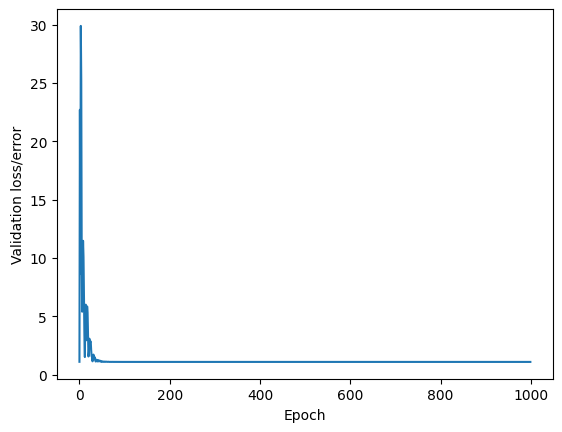

In [14]:
plt.plot(range(len(validation_losses)), validation_losses)
plt.ylabel("Validation loss/error")
plt.xlabel('Epoch')



plt.savefig('validation_loss.png')


